In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import models
from models import normalizar_sinal

In [2]:
# Carrega os dados, ignorando a primeira linha
dados_normalizados = 'Dados_Normalizados.csv'
dados_extraidos_geral = 'dados_extraidos_geral.csv'
dado_sensor = 'dados_extraidos_rolamento_interno_radial1.csv'
ordem = 1

df = pd.read_csv(f'{models.path_dados_tratados}/ordens_{ordem}/{dados_normalizados}', header=0)
# df = pd.DataFrame(df)[models.colunas]
# df['defeito'] = df['defeito'].replace(models.sensores)

# df['rotacao_hz'] = 10*(df['rotacao_hz']//10)
print(df['rotacao_hz'])

# df['sensor'] = df['sensor'].replace(models.sensores)

df = normalizar_sinal.NormalizarSinal(df,1).Get()
df = pd.DataFrame(df)[models.colunas]
print(df)
# print(df)

# Separa as colunas em features e target
features = df.drop('defeito', axis=1)
target = df['defeito']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=0)
# print(X_train)

0         0.054711
1         0.054711
2         0.054711
3         0.054711
4         0.054711
            ...   
165355    0.401216
165356    0.401216
165357    0.401216
165358    0.401216
165359    0.401216
Name: rotacao_hz, Length: 165360, dtype: float64
        rotacao_hz    maximo       rms  assimetria   curtose  fator_crista  \
0         0.054711  0.009545  0.021910    0.127253  0.044261      0.054624   
1         0.054711  0.009545  0.021947    0.127700  0.044343      0.054511   
2         0.054711  0.009545  0.021913    0.128246  0.044655      0.054615   
3         0.054711  0.009545  0.021898    0.127376  0.044411      0.054661   
4         0.054711  0.009545  0.021906    0.127553  0.044426      0.054637   
...            ...       ...       ...         ...       ...           ...   
165355    0.401216  0.120000  0.169677    0.019870  0.023770      0.096196   
165356    0.401216  0.120000  0.169710    0.020616  0.024080      0.096174   
165357    0.401216  0.120000  0.169415  

In [3]:
 
# Treina o classificador
clf = DecisionTreeClassifier(max_depth=10000000,random_state=1000)
metodo = 'DecisionTree'
# clf = svm.SVC()
clf.fit(X_train, y_train)

# Faz as previsões no conjunto de teste
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)


0.9507135945815192


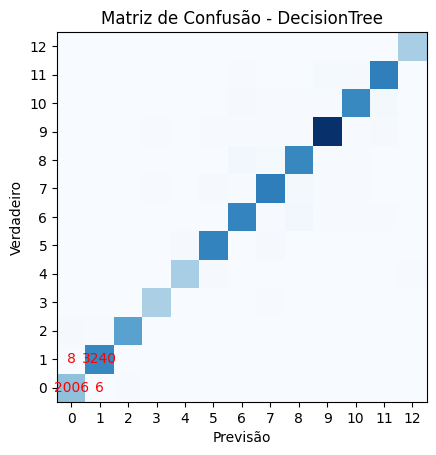

A precisão do classificador é: 95.1 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       0.97      0.98      0.98      2045
               ball_fault_baixo       0.99      0.99      0.99      3268
               ball_fault_medio       0.98      0.97      0.98      2764
 desalinhamento_horizontal_alto       0.93      0.93      0.93      1747
desalinhamento_horizontal_baixo       0.94      0.93      0.93      1813
desalinhamento_horizontal_médio       0.95      0.96      0.95      3426
   desalinhamento_vertical_alto       0.92      0.92      0.92      3552
  desalinhamento_vertical_baixo       0.93      0.93      0.93      3641
  desalinhamento_vertical_médio       0.90      0.91      0.91      3547
          desbalanceamento_alto       0.95      0.95      0.95      5105
         desbalanceamento_baixo       0.95      0.93      0.94      3444
         desbalanceamento_medio       0.94      0.95    

In [4]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),1),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [5]:
from sklearn.neighbors import KNeighborsClassifier

# Separar as features (X) da coluna "defeito" (y)
X = df.drop("defeito", axis=1)
y = df["defeito"]

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


# Treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=3)
metodo = 'KNeighbors'
knn.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar a performance do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", np.round(100*accuracy,2),'%')


Acurácia: 97.86 %


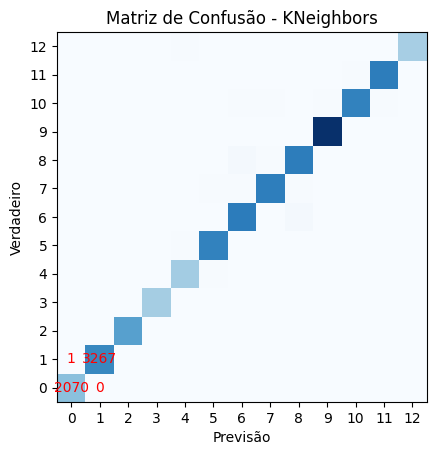

A precisão do classificador é: 97.86 %
Relatório de classificação:
                                  precision    recall  f1-score   support

                ball_fault_alto       1.00      1.00      1.00      2073
               ball_fault_baixo       1.00      1.00      1.00      3270
               ball_fault_medio       1.00      1.00      1.00      2771
 desalinhamento_horizontal_alto       0.96      0.98      0.97      1777
desalinhamento_horizontal_baixo       0.96      0.97      0.97      1814
desalinhamento_horizontal_médio       0.97      0.98      0.97      3444
   desalinhamento_vertical_alto       0.95      0.96      0.96      3611
  desalinhamento_vertical_baixo       0.97      0.97      0.97      3563
  desalinhamento_vertical_médio       0.96      0.95      0.95      3636
          desbalanceamento_alto       0.99      0.99      0.99      5006
         desbalanceamento_baixo       0.97      0.96      0.96      3513
         desbalanceamento_medio       0.98      0.98   

In [6]:
# Visualiza a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'Matriz de Confusão - {metodo}')
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.xticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.yticks(range(len(models.defeitos)-3), range(len(models.defeitos)-3))
plt.xlim(-0.5,len(models.defeitos)-3.5)
plt.ylim(-0.5,len(models.defeitos)-3.5)

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

# Imprime as métricas de performance
print("A precisão do classificador é:", np.round(100*accuracy_score(y_test, y_pred),2),'%')
print("Relatório de classificação:\n", classification_report(y_test, y_pred))